# Introduction

One of the leading HR solutions provider committed to optimizing talent acquisition processes for businesses across various industries. Their innovative approach combines cutting-edge technology with strategic insights to streamline recruitment and enhance workforce efficiency.

They are launching this project to develop a predictive model for estimating salary ranges for job listings as part of their ongoing efforts to revolutionize talent management. This project aims to leverage historical job data provided by our partners to predict both minimum and maximum salary ranges accurately for a given posting

# Importing Required Libaries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
# For specifying the axes tick format
import matplotlib.ticker as mtick 
from sklearn.preprocessing import LabelEncoder

# Loading The Dataset

In [4]:
#Load the Data set
df = pd.read_csv("C:\\Users\\ragul\\project\\Jobs_NYC_Postings.csv")

In [5]:
df

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,570670,DEPT OF HEALTH/MENTAL HYGIENE,External,1,Public Health Nurse III / Communicable Disease...,PUBLIC HEALTH NURSE,Competitive-1,51011,03,Constituent Services & Community Programs Health,...,"**Must follow all safety, security, Blood-born...",Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City Residency is not required for th...,01/24/2023,NaN,11/16/2023,03/04/2024
5116,552517,DEPARTMENT OF TRANSPORTATION,External,1,Engineer-In-Charge,CIVIL ENGINEER,Competitive-1,20215,02,"Engineering, Architecture, & Planning",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,35 Hours,55 Water St Ny Ny,NaN,New York City Residency is not required for th...,09/23/2022,NaN,09/29/2022,03/04/2024
5117,567353,DEPARTMENT OF CORRECTION,External,8,"Assistant Commissioner, Facility Operations",FACILITY SUPERVISOR (CORRECTIO,Non-Competitive-5,95090,M4,"Public Safety, Inspections, & Enforcement",...,The City of New York offers a comprehensive be...,For City employees: Go to Employee Self-Servic...,NaN,NaN,NaN,New York City residency is generally required ...,01/05/2023,NaN,01/26/2023,03/04/2024
5118,612424,BRONX DISTRICT ATTORNEY,Internal,1,Human Trafficking Victim's Advocate,COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,Constituent Services & Community Programs Heal...,...,NaN,"For City employees, to complete your applicati...",NaN,NaN,NaN,City Residency is not required for this position,10/20/2023,19-OCT-2024,10/20/2023,03/04/2024


# Exploaring Data Analysis

EDA allows us to gain a comprehensive overview of the data's structure, uncover potential patterns, and identify key trends. Throughout the EDA process, we will analyze the distribution of individual features, investigate correlations, and explore any inherent relationships between variables.

Visualizations will play a crucial role in providing a clear representation of the data, offering insights into customer behavior and identifying the factors that may contribute to Salary Range Predection

In [6]:
#Check the first 5 rows
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024


In [7]:
#Check the last 5 rows
df.tail()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024


In [8]:
df.shape

(5120, 30)

# Data Cleaning

Data cleaning is a crucial step in the machine learning pipeline where you preprocess and prepare your dataset before feeding it into a machine learning model.

Addressing these data cleaning steps, you can prepare a high-quality dataset for training machine learning models to predict salary ranges effectively.

In [9]:
df

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,02,Constituent Services & Community Programs Heal...,...,**IMPORTANT NOTES TO ALL CANDIDATES: Please n...,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,01/23/2024,22-MAY-2024,01/23/2024,03/04/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Policy, Research & Analysis Public Safety, Ins...",...,Authorization to work in the United States is ...,"For City Employees, please go to Employee Self...",35 Hours,"30-30 Thomson Avenue, LIC, NY 11101",NaN,New York City Residency is not required for th...,10/03/2023,NaN,11/29/2023,03/04/2024
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,ADMINISTRATIVE PROJECT MANAGER,Competitive-1,8300B,00,"Engineering, Architecture, & Planning",...,NaN,NaN,NaN,NaN,NaN,New York City Residency is not required for th...,02/01/2024,NaN,02/01/2024,03/04/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,PROCUREMENT ANALYST,Competitive-1,12158,02,"Finance, Accounting, & Procurement",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,9:00am â 5:00pm,To be determine.,NaN,New York City residency is generally required ...,04/04/2023,NaN,04/04/2023,03/04/2024
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",CITY RESEARCH SCIENTIST,Non-Competitive-5,21744,03,Constituent Services & Community Programs Heal...,...,NaN,Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City residency is generally required ...,02/06/2024,05-JUN-2024,02/21/2024,03/04/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,570670,DEPT OF HEALTH/MENTAL HYGIENE,External,1,Public Health Nurse III / Communicable Disease...,PUBLIC HEALTH NURSE,Competitive-1,51011,03,Constituent Services & Community Programs Health,...,"**Must follow all safety, security, Blood-born...",Apply online with a cover letter to https://a1...,NaN,NaN,NaN,New York City Residency is not required for th...,01/24/2023,NaN,11/16/2023,03/04/2024
5116,552517,DEPARTMENT OF TRANSPORTATION,External,1,Engineer-In-Charge,CIVIL ENGINEER,Competitive-1,20215,02,"Engineering, Architecture, & Planning",...,The City of New York is an inclusive equal opp...,Resumes may be submitted electronically using ...,35 Hours,55 Water St Ny Ny,NaN,New York City Residency is not required for th...,09/23/2022,NaN,09/29/2022,03/04/2024
5117,567353,DEPARTMENT OF CORRECTION,External,8,"Assistant Commissioner, Facility Operations",FACILITY SUPERVISOR (CORRECTIO,Non-Competitive-5,95090,M4,"Public Safety, Inspections, & Enforcement",...,The City of New York offers a comprehensive be...,For City employees: Go to Employee Self-Servic...,NaN,NaN,NaN,New York City residency is generally required ...,01/05/2023,NaN,01/26/2023,03/04/2024
5118,612424,BRONX DISTRICT ATTORNEY,Internal,1,Human Trafficking Victim's Advocate,COMMUNITY COORDINATOR,Non-Competitive-5,56058,00,Constituent Services & Community Programs Heal...,...,NaN,"For City employees, to complete your applicati...",NaN,NaN,NaN,City Residency is not required for this position,10/20/2023,19-OCT-2024,10/20/2023,03/04/2024


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Civil Service Title            5120 non-null   object 
 6   Title Classification           5120 non-null   object 
 7   Title Code No                  5120 non-null   object 
 8   Level                          5120 non-null   object 
 9   Job Category                   5120 non-null   object 
 10  Full-Time/Part-Time indicator  5003 non-null   object 
 11  Career Level                   5120 non-null   object 
 12  Salary Range From              5120 non-null   f

In [11]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Classification', 'Title Code No', 'Level',
       'Job Category', 'Full-Time/Part-Time indicator', 'Career Level',
       'Salary Range From', 'Salary Range To', 'Salary Frequency',
       'Work Location', 'Division/Work Unit', 'Job Description',
       'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'],
      dtype='object')

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Job ID,5120.0,598721.366211,28274.636161,469953.0,586358.0,607060.0,621404.0,628806.0
# Of Positions,5120.0,2.070898,5.799227,1.0,1.0,1.0,1.0,150.0
Salary Range From,5120.0,64625.224123,31378.516179,0.0,51869.0,62397.0,80557.0,225000.0
Salary Range To,5120.0,89978.575734,46732.299939,15.0,64608.0,85147.0,113550.0,252165.0
Recruitment Contact,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#check the null values
df.isnull().sum()

Job ID                              0
Agency                              0
Posting Type                        0
# Of Positions                      0
Business Title                      0
Civil Service Title                 0
Title Classification                0
Title Code No                       0
Level                               0
Job Category                        0
Full-Time/Part-Time indicator     117
Career Level                        0
Salary Range From                   0
Salary Range To                     0
Salary Frequency                    0
Work Location                       0
Division/Work Unit                  0
Job Description                     0
Minimum Qual Requirements          43
Preferred Skills                 1219
Additional Information           1862
To Apply                          426
Hours/Shift                      3210
Work Location 1                  3229
Recruitment Contact              5120
Residency Requirement               0
Posting Date

In [14]:
#check the data Shape
df.shape

(5120, 30)

In [15]:
# drop unnessery columns
# if  i drop column of Hours/Shift becouse it not clean and have alot of missing value that 
col=['Job Category','Hours/Shift','Work Location 1','Civil Service Title','Title Code No','Title Classification',
     'Division/Work Unit','Job Description','Minimum Qual Requirements','Preferred Skills','Additional Information',
     'To Apply','Recruitment Contact','Residency Requirement','Post Until','Posting Updated','Process Date']
df.drop(columns=col, inplace=True)

In [16]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Level,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Posting Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",02,F,Experienced (non-manager),82506.0,94882.0,Annual,42-09 28th Street,01/23/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,00,F,Experienced (non-manager),58682.0,134570.0,Annual,30-30 Thomson Ave L I City Qns,10/03/2023
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,00,F,Experienced (non-manager),58682.0,91405.0,Annual,30-30 Thomson Ave L I City Qns,02/01/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,02,F,Experienced (non-manager),50972.0,82730.0,Annual,55 Water St Ny Ny,04/04/2023
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",03,F,Experienced (non-manager),92301.0,106146.0,Annual,42-09 28th Street,02/06/2024


In [17]:
#Check the information abt data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5120 non-null   int64  
 1   Agency                         5120 non-null   object 
 2   Posting Type                   5120 non-null   object 
 3   # Of Positions                 5120 non-null   int64  
 4   Business Title                 5120 non-null   object 
 5   Level                          5120 non-null   object 
 6   Full-Time/Part-Time indicator  5003 non-null   object 
 7   Career Level                   5120 non-null   object 
 8   Salary Range From              5120 non-null   float64
 9   Salary Range To                5120 non-null   float64
 10  Salary Frequency               5120 non-null   object 
 11  Work Location                  5120 non-null   object 
 12  Posting Date                   5120 non-null   o

In [18]:
#Check the data types
df.dtypes

Job ID                             int64
Agency                            object
Posting Type                      object
# Of Positions                     int64
Business Title                    object
Level                             object
Full-Time/Part-Time indicator     object
Career Level                      object
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                  object
Work Location                     object
Posting Date                      object
dtype: object

In [19]:
df.rename(columns={'# Of Positions': 'Number Of Positions'}, inplace=True)

In [20]:
df.dtypes

Job ID                             int64
Agency                            object
Posting Type                      object
Number Of Positions                int64
Business Title                    object
Level                             object
Full-Time/Part-Time indicator     object
Career Level                      object
Salary Range From                float64
Salary Range To                  float64
Salary Frequency                  object
Work Location                     object
Posting Date                      object
dtype: object

In [21]:
df.isnull().sum()

Job ID                             0
Agency                             0
Posting Type                       0
Number Of Positions                0
Business Title                     0
Level                              0
Full-Time/Part-Time indicator    117
Career Level                       0
Salary Range From                  0
Salary Range To                    0
Salary Frequency                   0
Work Location                      0
Posting Date                       0
dtype: int64

In [22]:
#Check the unique Values
df['Full-Time/Part-Time indicator'].unique()

array(['F', 'P', nan], dtype=object)

In [23]:
#Check the values Counts
df['Full-Time/Part-Time indicator'].value_counts()

Full-Time/Part-Time indicator
F    4841
P     162
Name: count, dtype: int64

In [24]:
df['Full-Time/Part-Time indicator'] = df['Full-Time/Part-Time indicator'].fillna('F')

In [25]:
df.head()

,Job ID,Agency,Posting Type,Number Of Positions,Business Title,Level,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Posting Date
0,623668,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Research Analyst, IMAT, Bureau of Maternal Inf...",02,F,Experienced (non-manager),82506.0,94882.0,Annual,42-09 28th Street,01/23/2024
1,608193,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Deputy Director,00,F,Experienced (non-manager),58682.0,134570.0,Annual,30-30 Thomson Ave L I City Qns,10/03/2023
2,625094,DEPT OF DESIGN & CONSTRUCTION,Internal,1,Senior Project Manager,00,F,Experienced (non-manager),58682.0,91405.0,Annual,30-30 Thomson Ave L I City Qns,02/01/2024
3,580593,DEPARTMENT OF TRANSPORTATION,External,1,Procurement Analyst 2,02,F,Experienced (non-manager),50972.0,82730.0,Annual,55 Water St Ny Ny,04/04/2023
4,624937,DEPT OF HEALTH/MENTAL HYGIENE,External,1,"Deputy Director, HIV Planning Council, Divisio...",03,F,Experienced (non-manager),92301.0,106146.0,Annual,42-09 28th Street,02/06/2024


In [26]:
df.isna().sum()

Job ID                           0
Agency                           0
Posting Type                     0
Number Of Positions              0
Business Title                   0
Level                            0
Full-Time/Part-Time indicator    0
Career Level                     0
Salary Range From                0
Salary Range To                  0
Salary Frequency                 0
Work Location                    0
Posting Date                     0
dtype: int64

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Job ID,5120.0,598721.366211,28274.636161,469953.0,586358.0,607060.0,621404.0,628806.0
Number Of Positions,5120.0,2.070898,5.799227,1.0,1.0,1.0,1.0,150.0
Salary Range From,5120.0,64625.224123,31378.516179,0.0,51869.0,62397.0,80557.0,225000.0
Salary Range To,5120.0,89978.575734,46732.299939,15.0,64608.0,85147.0,113550.0,252165.0


In [28]:
df.columns

Index(['Job ID', 'Agency', 'Posting Type', 'Number Of Positions',
       'Business Title', 'Level', 'Full-Time/Part-Time indicator',
       'Career Level', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Posting Date'],
      dtype='object')

# Checking the Duplicated & Null Values

Before moving further with the analysis, it is essential to ensure the integrity of our dataset. We will begin by examining for any missing values and identifying potential duplicates. This step is crucial for maintaining data quality and setting the foundation for a robust exploratory data analysis (EDA) and subsequent machine learning model development.

In [29]:
df.duplicated().sum()

23

In [30]:
df.drop_duplicates(inplace = True)

In [31]:
df.duplicated().sum()

0

In [32]:
df.isna().sum()

Job ID                           0
Agency                           0
Posting Type                     0
Number Of Positions              0
Business Title                   0
Level                            0
Full-Time/Part-Time indicator    0
Career Level                     0
Salary Range From                0
Salary Range To                  0
Salary Frequency                 0
Work Location                    0
Posting Date                     0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5097 entries, 0 to 5119
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5097 non-null   int64  
 1   Agency                         5097 non-null   object 
 2   Posting Type                   5097 non-null   object 
 3   Number Of Positions            5097 non-null   int64  
 4   Business Title                 5097 non-null   object 
 5   Level                          5097 non-null   object 
 6   Full-Time/Part-Time indicator  5097 non-null   object 
 7   Career Level                   5097 non-null   object 
 8   Salary Range From              5097 non-null   float64
 9   Salary Range To                5097 non-null   float64
 10  Salary Frequency               5097 non-null   object 
 11  Work Location                  5097 non-null   object 
 12  Posting Date                   5097 non-null   object

Our dataset does not have any null values and duplicates.

Now we can proceed with confidence, knowing that our dataset is clean and ready for further analysis.

# Analysis

To perform a comprehensive analysis, we'd typically start by examining the characteristics of the dataset, exploring the distribution of variables, identifying patterns, and gaining insights that might inform our modeling approach.

This, in turn, can lead to more accurate and reliable predictions of salary ranges in your machine learning models.

In [34]:
#check the value counts for Job ID
df['Job ID'].value_counts()

Job ID
512652    3
623668    2
587642    2
627315    2
591164    2
         ..
561419    1
571355    1
590759    1
571353    1
574334    1
Name: count, Length: 2626, dtype: int64

In [35]:
#check the values count for Agency
df['Agency'].value_counts()

Agency
DEPT OF ENVIRONMENT PROTECTION    928
DEPT OF HEALTH/MENTAL HYGIENE     758
HRA/DEPT OF SOCIAL SERVICES       712
DEPT OF DESIGN & CONSTRUCTION     452
DEPARTMENT OF TRANSPORTATION      448
NYC HOUSING AUTHORITY             306
BRONX DISTRICT ATTORNEY           168
DEPARTMENT OF CORRECTION          121
FINANCIAL INFO SVCS AGENCY        117
HOUSING PRESERVATION & DVLPMNT     84
OFFICE OF THE COMPTROLLER          76
ADMIN FOR CHILDREN'S SVCS          75
DEPT. OF HOMELESS SERVICES         72
DEPT OF CITYWIDE ADMIN SVCS        68
DEPARTMENT OF FINANCE              62
OFFICE OF MANAGEMENT & BUDGET      48
DISTRICT ATTORNEY-MANHATTAN        44
TAXI & LIMOUSINE COMMISSION        44
CAMPAIGN FINANCE BOARD             38
CONSUMER AND WORKER PROTECTION     32
DEPARTMENT OF CITY PLANNING        30
OFFICE OF EMERGENCY MANAGEMENT     29
LAW DEPARTMENT                     29
DEPT OF YOUTH & COMM DEV SRVS      28
DEPT OF PARKS & RECREATION         24
NYC EMPLOYEES RETIREMENT SYS       24
DEPAR

In [36]:
#check the values count for  posting type
df['Posting Type'].value_counts()

Posting Type
Internal    2590
External    2507
Name: count, dtype: int64

In [37]:
posting_type=df['Posting Type'].value_counts().reset_index()
posting_type

,Posting Type,count
0,Internal,2590
1,External,2507


In [38]:
#check the value counts for No of Positions
df['Number Of Positions'].value_counts()

Number Of Positions
1      4083
2       433
3       155
4        88
5        82
7        39
6        38
10       33
8        31
15       22
9        13
18        7
70        6
20        6
11        6
13        5
60        4
25        4
16        4
24        4
12        4
19        3
40        3
98        2
21        2
46        2
17        2
81        2
150       2
26        2
14        2
32        2
30        2
34        2
75        2
Name: count, dtype: int64

In [39]:
n_position=df['Number Of Positions'].value_counts().reset_index()
n_position=n_position.head(5)
n_position

,Number Of Positions,count
0,1,4083
1,2,433
2,3,155
3,4,88
4,5,82


In [40]:
top20_Business_Title=df['Business Title'].value_counts().reset_index()
top20_Business_Title=top20_Business_Title.head(20)
top20_Business_Title

,Business Title,count
0,Project Manager,63
1,CASE MANAGEMENT SUPERVISOR,62
2,ACCOUNTABLE MANAGER,58
3,Deputy Director,38
4,CASE MANAGEMENT TEAM LEADER,36
5,Senior Project Manager,30
6,Director,24
7,Design Engineer,22
8,"Child Care Inspector, Bureau of Childcare",22
9,Assistant Civil Engineer,20


In [41]:
#check the value counts for Career Level
df['Career Level'].value_counts()

Career Level
Experienced (non-manager)    3827
Manager                       583
Entry-Level                   455
Student                       134
Executive                      98
Name: count, dtype: int64

In [42]:
career_level=df['Career Level'].value_counts().reset_index()
career_level

,Career Level,count
0,Experienced (non-manager),3827
1,Manager,583
2,Entry-Level,455
3,Student,134
4,Executive,98


In [43]:
#Check the values Couts for Salary Range From
df['Salary Range From'].value_counts()

Salary Range From
59116.00    179
62370.00    140
58700.00    129
82506.00     90
58682.00     88
           ... 
49328.00      1
69435.00      1
49609.00      1
89818.00      1
37834.56      1
Name: count, Length: 559, dtype: int64

In [44]:
df['Salary Range From'].describe()

count      5097.000000
mean      64639.484699
std       31409.790870
min           0.000000
25%       51869.000000
50%       62470.000000
75%       80557.000000
max      225000.000000
Name: Salary Range From, dtype: float64

In [45]:
#Check the values Couts for Salary Range To
df['Salary Range To'].value_counts()

Salary Range To
71726.00     75
91768.00     73
208826.00    73
93587.00     72
173486.00    69
             ..
72571.00      1
94543.00      1
29.98         1
185000.00     1
136951.00     1
Name: count, Length: 748, dtype: int64

In [46]:
df['Salary Range To'].describe()

count      5097.000000
mean      89896.835738
std       46728.105926
min          15.000000
25%       64608.000000
50%       85147.000000
75%      113550.000000
max      252165.000000
Name: Salary Range To, dtype: float64

In [47]:
#Check the Salary Frequency
Salary_Frequency=df['Salary Frequency'].value_counts().reset_index()
Salary_Frequency

,Salary Frequency,count
0,Annual,4663
1,Hourly,384
2,Daily,50


In [48]:
top5_Work_Location=df['Work Location'].value_counts().reset_index()
top5_Work_Location=top5_Work_Location.head(5)
top5_Work_Location

,Work Location,count
0,30-30 Thomson Ave L I City Qns,434
1,96-05 Horace Harding Expway,399
2,55 Water St Ny Ny,368
3,42-09 28th Street,319
4,59-17 Junction Blvd Corona Ny,273


In [49]:
data=df.groupby('Business Title')['Career Level'].value_counts().reset_index()
data=data.sort_values(by='count',ascending=False).head(30)
data

,Business Title,Career Level,count
323,CASE MANAGEMENT SUPERVISOR,Experienced (non-manager),62
3,ACCOUNTABLE MANAGER,Experienced (non-manager),52
1387,Project Manager,Experienced (non-manager),45
324,CASE MANAGEMENT TEAM LEADER,Experienced (non-manager),36
685,Deputy Director,Experienced (non-manager),34
728,Design Engineer,Experienced (non-manager),22
435,"Child Care Inspector, Bureau of Childcare",Experienced (non-manager),22
495,College Aide,Student,20
1664,Senior Project Manager,Experienced (non-manager),20
745,Director,Manager,20


In [50]:
time_indicator=df['Full-Time/Part-Time indicator'].value_counts().reset_index()
time_indicator

,Full-Time/Part-Time indicator,count
0,F,4935
1,P,162


In [51]:
df_Salary_Frequency=df.groupby(['Career Level'])['Salary Frequency'].value_counts().reset_index()
df_Salary_Frequency=df_Salary_Frequency.sort_values(by='count',ascending=False).head(30)
df_Salary_Frequency

,Career Level,Salary Frequency,count
4,Experienced (non-manager),Annual,3588
7,Manager,Annual,581
0,Entry-Level,Annual,394
5,Experienced (non-manager),Hourly,197
9,Student,Hourly,132
3,Executive,Annual,98
1,Entry-Level,Hourly,55
6,Experienced (non-manager),Daily,42
2,Entry-Level,Daily,6
8,Manager,Daily,2


In [52]:
df_time_indicator=df.groupby(['Career Level'])['Full-Time/Part-Time indicator'].value_counts().reset_index()
df_time_indicator=df_time_indicator.sort_values(by='count',ascending=False).head(30)
df_time_indicator

,Career Level,Full-Time/Part-Time indicator,count
3,Experienced (non-manager),F,3723
5,Manager,F,583
0,Entry-Level,F,427
4,Experienced (non-manager),P,104
6,Student,F,104
2,Executive,F,98
7,Student,P,30
1,Entry-Level,P,28


In [89]:
#Removing missing values 
df.dropna(inplace = True)

In [90]:
#Remove  from the data set
df2=df.iloc[:,1:]

In [91]:
df2

,Agency,Posting Type,Number Of Positions,Business Title,Level,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Posting Date,Midpoint Salary
0,22,0,1,1431,2,0,2,82506.0,94882.0,0,132,29,88694.0
1,20,1,1,657,0,0,2,58682.0,134570.0,0,110,336,96626.0
2,20,1,1,1592,0,0,2,58682.0,91405.0,0,110,46,75043.5
3,18,0,1,1288,2,0,2,50972.0,82730.0,0,151,125,66851.0
4,22,0,1,681,3,0,2,92301.0,106146.0,0,132,55,99223.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,22,0,1,1377,3,0,2,84252.0,84252.0,0,109,30,84252.0
5116,18,0,1,855,2,0,2,80557.0,111917.0,0,151,319,96237.0
5117,13,0,8,149,12,0,1,201587.0,201587.0,0,230,4,201587.0
5118,3,1,1,1002,0,0,2,67983.0,67983.0,0,68,360,67983.0


# Data Visualization

Data visualization is a powerful tool for understanding patterns, trends, and relationships within your dataset.

This techniques you can use to analyze your dataset for salary range prediction.

Depending on the specific questions you want to explore and the characteristics of your data, you can customize these visualizations and explore additional techniques as needed.

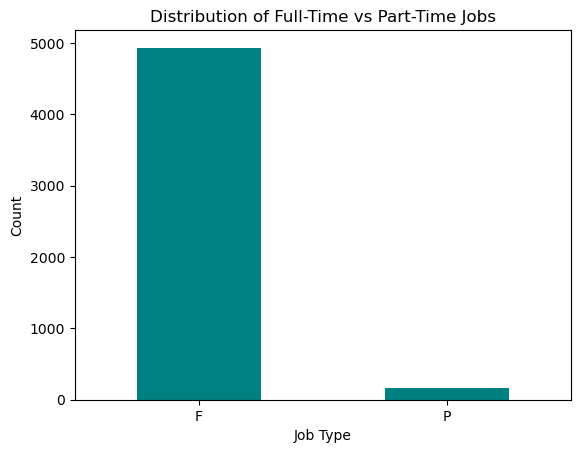

In [56]:
df['Full-Time/Part-Time indicator'].value_counts().plot(kind='bar', color='teal')
plt.title('Distribution of Full-Time vs Part-Time Jobs')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

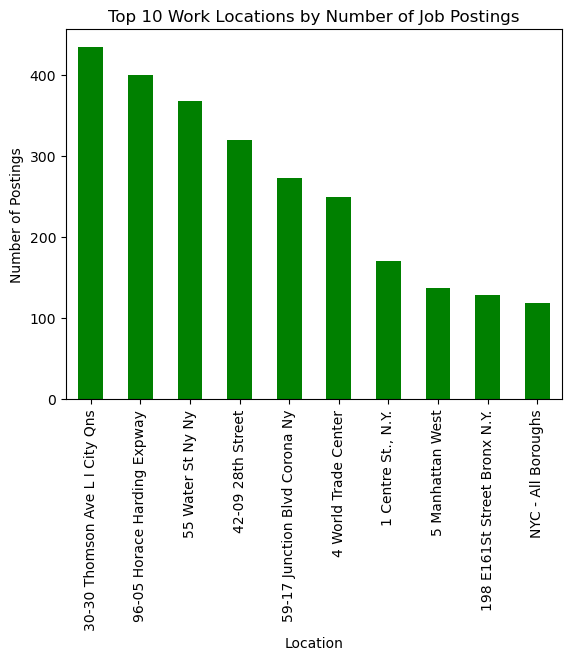

In [58]:
df['Work Location'].value_counts().head(10).plot(kind='bar', color='green')
plt.title('Top 10 Work Locations by Number of Job Postings')
plt.xlabel('Location')
plt.ylabel('Number of Postings')
plt.xticks(rotation=90)
plt.show()

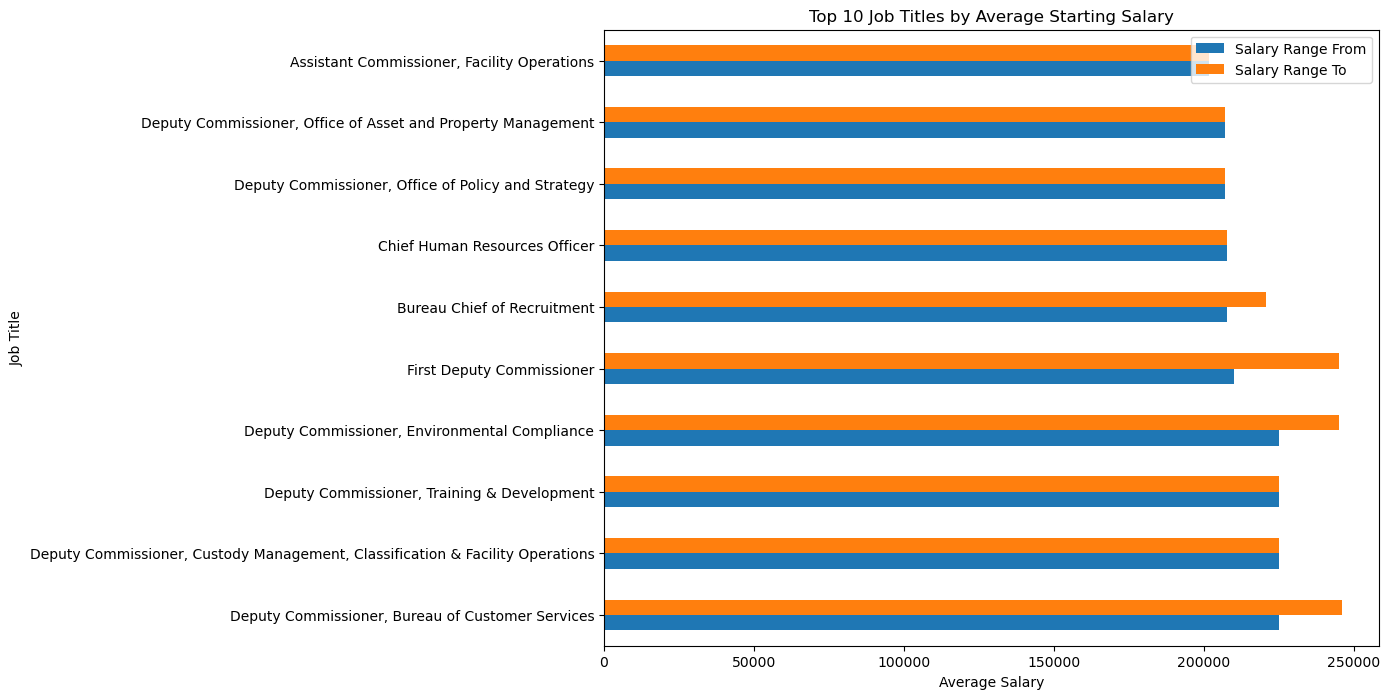

In [59]:
# Grouping by 'Business Title' and calculating average salary ranges, then sorting by 'Salary Range From'
top_salaries = df.groupby('Business Title')[['Salary Range From', 'Salary Range To']].mean()
top_salaries_sorted = top_salaries.sort_values(by='Salary Range From', ascending=False).head(10)

# Plotting the top 10 job titles by highest average starting salary
top_salaries_sorted.plot(kind='barh', figsize=(10, 8))
plt.title('Top 10 Job Titles by Average Starting Salary')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.show()

# Correlation heatmap

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le = LabelEncoder()

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Job ID,Agency,Posting Type,Number Of Positions,Business Title,Level,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Posting Date
0,623668,22,0,1,1431,2,0,2,82506.0,94882.0,0,132,29
1,608193,20,1,1,657,0,0,2,58682.0,134570.0,0,110,336
2,625094,20,1,1,1592,0,0,2,58682.0,91405.0,0,110,46
3,580593,18,0,1,1288,2,0,2,50972.0,82730.0,0,151,125
4,624937,22,0,1,681,3,0,2,92301.0,106146.0,0,132,55


<Axes: >

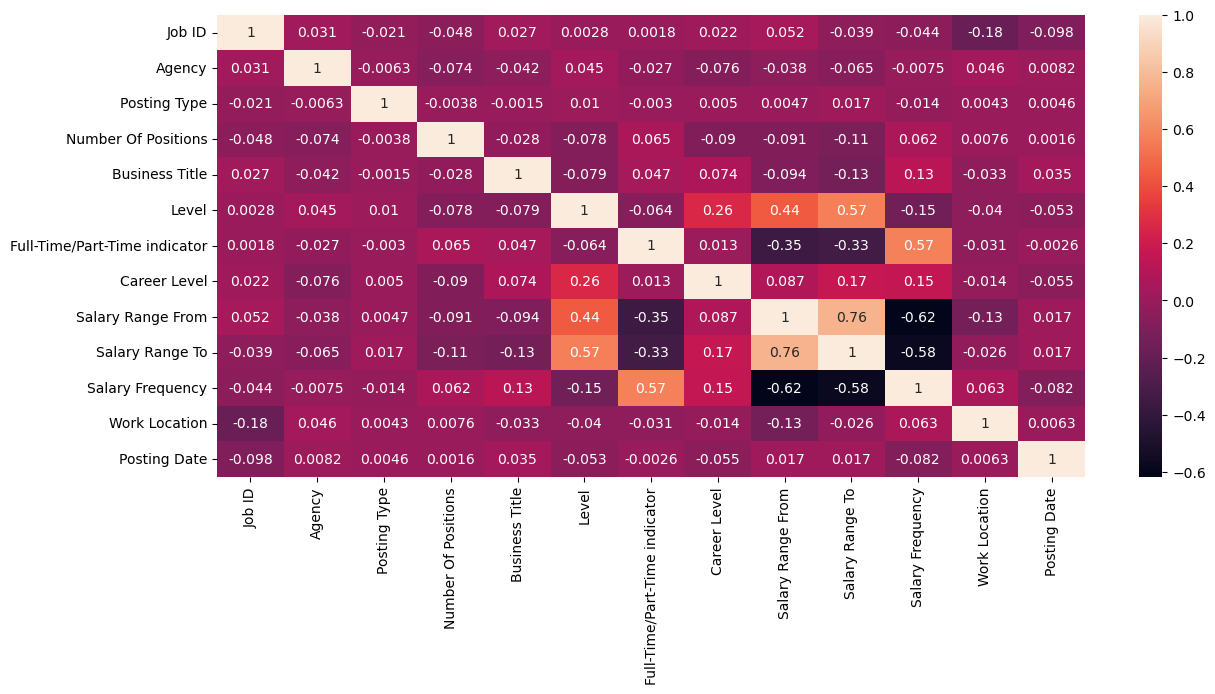

In [62]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=True)

# Find the Minimum and Maximum Salary

MINIMUM SALARY

In [63]:
min_salary_offered_df = pd.DataFrame([df['Salary Range To'].min()], columns=['Minimum Salary Offered'])
display(min_salary_offered_df)

,Minimum Salary Offered
0,15.0


Maximum Salary

In [64]:
max_salary_offered_df = pd.DataFrame([df['Salary Range To'].max()], columns=['Maximum Salary Offered'])
display(max_salary_offered_df)

,Maximum Salary Offered
0,252165.0


MEDIAN SALARY BY LEVEL

In [65]:
median_salaries_by_level = df.groupby('Level')[['Salary Range From', 'Salary Range To']].median().reset_index()
display(median_salaries_by_level)

,Level,Salary Range From,Salary Range To
0,0,58700.0,79568.0
1,1,56677.0,69709.0
2,2,71423.0,85147.0
3,3,78745.0,100026.5
4,4,43728.0,68645.0
5,5,68202.0,78432.0
6,6,39763.0,64420.0
7,7,103026.0,120385.0
8,8,105746.0,121608.0
9,9,58700.0,121300.0


# AVERAGE SALARY

In [66]:
# Calculate midpoint salary
df['Midpoint Salary'] = (df['Salary Range From'] + df['Salary Range To']) / 2

In [67]:
average_salary = df['Midpoint Salary'].mean()
print("Average salary:", average_salary)

Average salary: 77268.1602185207


# Preprocessing

First, Let's drop the columns that don't provide any useful information for our predictions

In [68]:
df2["salary"] = ( df2["Salary Range From"] + df2["Salary Range To"] ) / 2

In [69]:
df2.drop(["Salary Range From", "Salary Range To"], axis=1, inplace=True)

### Encoding Categorical Variables

To convert categorical data into numerical, we will use the one-hot encoding technique.

This process involves assigning binary numeric values to each unique class present in columns with categorical data. By creating binary columns for each category, we ensure that our models can effectively interpret and utilize the categorical information during training and prediction.

In [70]:
#Let's convert all the categorical variables into dummy variables

df_dummies = pd.get_dummies(df2)
df_dummies.head()

,Number Of Positions,salary,Agency_ADMIN FOR CHILDREN'S SVCS,Agency_ADMIN TRIALS AND HEARINGS,Agency_BRONX COMMUNITY BOARD #7,Agency_BRONX DISTRICT ATTORNEY,Agency_BUSINESS INTEGRITY COMMISSION,Agency_CAMPAIGN FINANCE BOARD,Agency_CIVILIAN COMPLAINT REVIEW BD,Agency_CONFLICTS OF INTEREST BOARD,...,Posting Date_12/26/2022,Posting Date_12/26/2023,Posting Date_12/27/2022,Posting Date_12/27/2023,Posting Date_12/28/2022,Posting Date_12/28/2023,Posting Date_12/29/2022,Posting Date_12/29/2023,Posting Date_12/30/2021,Posting Date_12/30/2022
0,1,88694.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,96626.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,75043.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,66851.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,99223.5,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5097 entries, 0 to 5119
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Job ID                         5097 non-null   int64  
 1   Agency                         5097 non-null   int32  
 2   Posting Type                   5097 non-null   int32  
 3   Number Of Positions            5097 non-null   int64  
 4   Business Title                 5097 non-null   int32  
 5   Level                          5097 non-null   int32  
 6   Full-Time/Part-Time indicator  5097 non-null   int32  
 7   Career Level                   5097 non-null   int32  
 8   Salary Range From              5097 non-null   float64
 9   Salary Range To                5097 non-null   float64
 10  Salary Frequency               5097 non-null   int32  
 11  Work Location                  5097 non-null   int32  
 12  Posting Date                   5097 non-null   int32 

# Split the the Data into Training & Testing

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
# Drop the target variable 'Salary Range From' and other irrelevant columns
x = df.drop(['Salary Range From', 'Salary Range To'], axis=1)

In [145]:
# Define the target variable
# or 'Salary Range To' depending on your prediction target
y = df['Salary Range From']  

We'll now split the dataset into training and testing data. We will do an 80:20 split, so our test size will be set to 0.2.

We will take Random State as 123. This will guarantee the reproducibility of our results across different runs.

In [146]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [147]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4077, 12)
(1020, 12)
(4077,)
(1020,)


# Standard Scaler

We will now use Standard Scaler to standardize the features of the dataset. This ensures that the consistency between the features of the dataset is maintained. Standardization is crucial for certain machine learning algorithms, promoting optimal model performance by mitigating the influence of varying magnitudes among features.

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [150]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4077, 12)
(1020, 12)
(4077,)
(1020,)


# Check the imbalance in Dataset

In [151]:
# Check the distribution of the target variable
salary_range_from_distribution = df['Salary Range From'].value_counts()
salary_range_to_distribution = df['Salary Range To'].value_counts()

In [152]:
# Print the distributions
print("Distribution of Salary Range From:")
print(salary_range_from_distribution)
print("\nDistribution of Salary Range To:")
print(salary_range_to_distribution)

Distribution of Salary Range From:
Salary Range From
59116.00    179
62370.00    140
58700.00    129
82506.00     90
58682.00     88
           ... 
49328.00      1
69435.00      1
49609.00      1
89818.00      1
37834.56      1
Name: count, Length: 559, dtype: int64

Distribution of Salary Range To:
Salary Range To
71726.00     75
91768.00     73
208826.00    73
93587.00     72
173486.00    69
             ..
72571.00      1
94543.00      1
29.98         1
185000.00     1
136951.00     1
Name: count, Length: 748, dtype: int64


In [153]:
# Check for imbalance
if len(salary_range_from_distribution) == 1 or len(salary_range_to_distribution) == 1:
    print("\nThere is an imbalance in the dataset.")
else:
    print("\nThe dataset is balanced.")


The dataset is balanced.


To check for class imbalance in a dataset, you can compute the distribution of the target variable (in this case, salary range) and see if there is a significant disparity between the frequencies of different classes.

If the imbalance ratio is close to 1, it indicates a balanced dataset.

If the imbalance ratio is significantly less than 1, it indicates a class imbalance issue, where one class is underrepresented compared to others.

n such cases, you may need to address the class imbalance using techniques like oversampling, undersampling, or using algorithms that are robust to class imbalance.

# ML Model

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [155]:
LR = LinearRegression()

In [156]:
LR_model = LR.fit(x_train, y_train)

In [157]:
y_pred = LR_model.predict(x_test)

In [158]:
#Check the Linear regression score
LR.score(x_test,y_test)

0.8624465993479882

In [159]:
print('Linear Regression')
print("Root MSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))


Linear Regression
Root MSE:  11821.067980317297


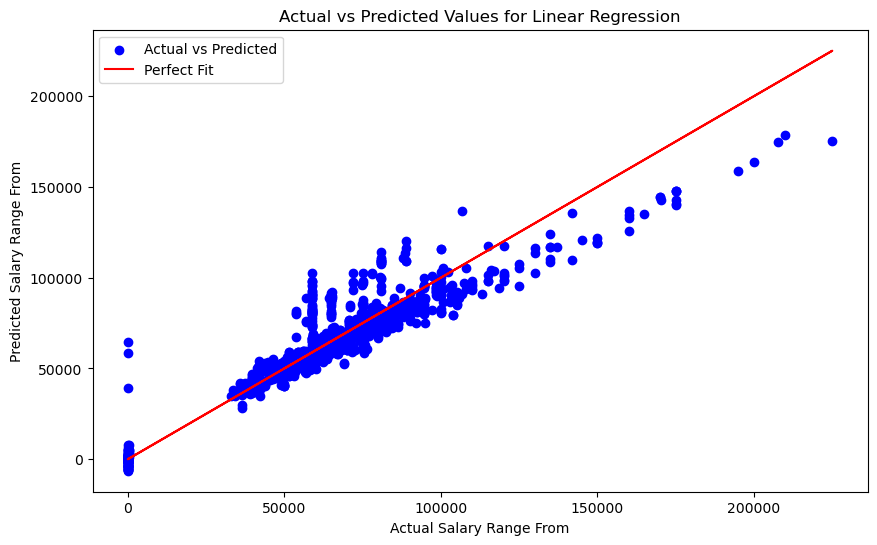

In [160]:
# Plot actual vs predicted values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot(y_test, y_test, color='red', label='Perfect Fit')
plt.xlabel('Actual Salary Range From')
plt.ylabel('Predicted Salary Range From')
plt.title('Actual vs Predicted Values for Linear Regression')
plt.legend()
plt.show()

# 1.Decession Tree

In [161]:
from sklearn.tree import DecisionTreeRegressor

In [162]:
# Create a Decision Tree Regressor Model
dt_reg = DecisionTreeRegressor(random_state=42)

In [163]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [164]:
#Check the Decision Regression tree Score
dt_reg.score(x_test,y_test)

0.966729486645335

In [165]:
y_pred = dt_reg.predict(x_test)

In [166]:
 mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nMean Squared Error:", mse)


Mean Squared Error: 5813.675671066776


As we can see Decession Tree Regressor is giving result little high so next going to check with Random Forest Regressor

# 2.Random Forest

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
# Creating and training the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [108]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [109]:
#Check the Random Forest Regression Score
rf_model.score(x_test,y_test)

0.9810640021621319

In [110]:
y_pred = rf_model.predict(x_test)

In [111]:
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nMean Squared Error:", mse)


Mean Squared Error: 4385.9648487016475


As we can see Random Forest Regressor is giving result medium high so next going to check with Xgb boost Regressor

# 3.xgb boost

In [112]:
from xgboost import XGBRegressor 

In [113]:
# Creating and training the XGBoost Regression model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

In [114]:
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [115]:
#Check the Xgb Regression score
xgb_model.score(x_test,y_test)

0.9844522679677488

In [116]:
y_pred = xgb_model.predict(x_test)

In [117]:
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Mean Squared Error:", mse)

Mean Squared Error: 3974.244413971206


As we can see xgb Boost is giving best result amoung Linear Regression, Decision Tree and Random Forest

# Hyper Parameter Tuning

# 1 .Decession Tree

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [119]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [120]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

In [121]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [122]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

In [123]:
print("Best Parameters:", best_params)
print("Best RMSE:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best RMSE: 6428.031829526462


In [124]:
dt_reg = DecisionTreeRegressor(random_state=42,max_depth=None,min_samples_leaf=1,min_samples_split=2)
dt_reg.fit(x_train, y_train)
print(dt_reg.score(x_test,y_test))


0.966729486645335


# 2.Random Forest

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [127]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [128]:
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   random_state=42,
                                   n_jobs=-1)

In [129]:
# Fit the random search to the data
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [130]:
#Get the best parameters and best score
best_params = random_search.best_params_
best_score = np.sqrt(-random_search.best_score_)

In [131]:
print("Best Parameters:", best_params)
print("Best RMSE:", best_score)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best RMSE: 6272.299889906094


In [132]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42,min_samples_split=2,min_samples_leaf=1,max_features='log2',max_depth=None)
rf_model.fit(x_train, y_train)
print(rf_model.score(x_test,y_test))

0.9747206090390694


# 3.xgb boost

In [133]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [135]:
#Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4, 5],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0]
}

In [136]:
# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=XGBRegressor(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=100,
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   random_state=42,
                                   n_jobs=-1)

In [137]:
# Fit the random search to the data
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          0.5],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [138]:
# Get the best parameters and best score
best_params = random_search.best_params_
best_score = np.sqrt(-random_search.best_score_)

In [139]:
print("Best Parameters:", best_params)
print("Best RMSE:", best_score)

Best Parameters: {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alpha': 1.0, 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}
Best RMSE: 4430.581217052332


In [140]:
xgb_model = XGBRegressor(n_estimators=400, random_state=42,subsample= 0.7, reg_lambda= 0.5, reg_alpha=1.0, min_child_weight=3, max_depth= 7, learning_rate= 0.1, gamma= 0.1, colsample_bytree= 0.1)
xgb_model.fit(x_train, y_train)
print(xgb_model.score(x_test,y_test))

0.9311208509657323


Based on the analysis and evaluation of three regressor models — Linear Regressor, Random Forest Regressor, and XGBoost Regressor — for predicting salary ranges

Based on the performance evaluation metrics such as Mean Squared Error (MSE), we can conclude that the and XGBoost Regressor generally perform very well then the Linear Regressor, Decession Tree Regreesor & Random Forest regressor

Overall, Decession Tree , Random Forest and XGBoost regressors are promising models for predicting salary ranges, with XGBoost potentially giving better performance.

As we all can see xgb boost gave us the best accuracy so at the end we will consider to predit the salary........


